In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

###
    Correct +ve Predictions => True +ve (TP), Incorrect +ve Predictions => False +ve (FP)
    Correct -ve Predictions => True -ve (TN), Incorrect -ve Predictions => False -ve (FN)

###
    --> Accuracy = (TP+TN)/Total
    --> Precision: What proportion of positive identifications was actually correct? => TP/(TP+FP)
    --> Recall: What proportion of actual positives was identified correctly? => TP/(TP+FN)
    --> F1 Score: HM of Precison & Recall

In [21]:
df = pd.read_csv('./data/sonar_dataset.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [22]:
# NA Values 
df.shape[1] == df.isna().sum().count()

True

In [23]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60'],
      dtype='object')

In [24]:
df['60'].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [25]:
X = df.drop('60', axis='columns')
y = df['60']

print(X.shape, y.shape)

(208, 60) (208,)


In [26]:
y = pd.get_dummies(y, drop_first=True)
y.head()

,R
0,1
1,1
2,1
3,1
4,1


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(166, 60) (42, 60) (166, 1) (42, 1)


In [28]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=(60), activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 0.6745 - accuracy: 0.5904
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.7169
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.7229
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5916 - accuracy: 0.6988
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.7590
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5399 - accuracy: 0.7289
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.7771
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7771
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.7651
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.7892
Epoch 11/

In [29]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 1.3044 - accuracy: 0.8095


[1.3043771982192993, 0.8095238208770752]

### 
    Training Accuracy >> Testing Accuracy => Overfitting 

In [30]:
y_pred = model.predict(X_test)
y_pred[:3]


2/2 [==============================] - 0s 4ms/step


array([[0.9999985 ],
       [0.9999979 ],
       [0.00500304]], dtype=float32)

In [31]:
y_pred = np.round(y_pred)
y_pred[:3]

array([[1.],
       [1.],
       [0.]], dtype=float32)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        18
           1       1.00      0.67      0.80        24

    accuracy                           0.81        42
   macro avg       0.85      0.83      0.81        42
weighted avg       0.87      0.81      0.81        42



Text(50.722222222222214, 0.5, 'Truth')

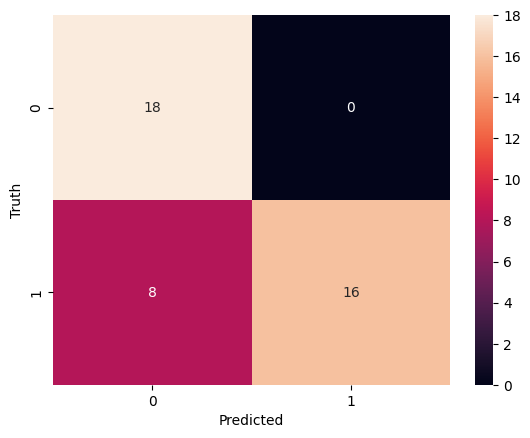

In [33]:
cm = confusion_matrix(y_test,y_pred)

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Dropout Regulaization
    During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. 

In [34]:
model1 = keras.Sequential([
    keras.layers.Dense(60, input_dim=(60), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(
    loss='binary_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

model1.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 0.7338 - accuracy: 0.5060
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5723
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5361
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.6024
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5181
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.5783
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6084
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6678 - accuracy: 0.5783
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6523 - accuracy: 0.6084
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5783
Epoch 11/

In [35]:
model1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.6002 - accuracy: 0.7857


[0.6002129316329956, 0.7857142686843872]

In [36]:
y_pred = model1.predict(X_test)
y_pred = np.round(y_pred)

2/2 [==============================] - 0s 4ms/step


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79        18
           1       0.94      0.67      0.78        24

    accuracy                           0.79        42
   macro avg       0.81      0.81      0.79        42
weighted avg       0.83      0.79      0.78        42



Text(50.722222222222214, 0.5, 'Truth')

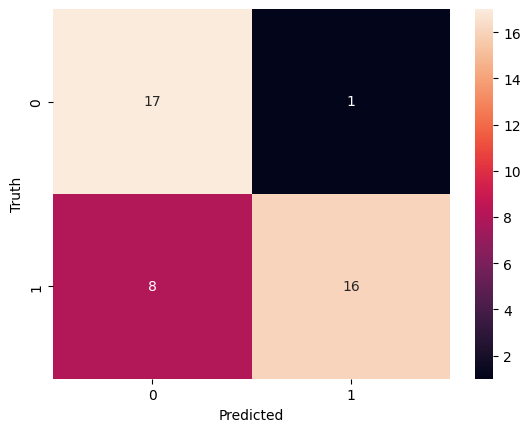

In [38]:
cm = confusion_matrix(y_test,y_pred)

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')